In [22]:
%run detection.py

loading annotations into memory...
Done (t=0.76s)
creating index...
index created!
Val samples: 5000
1
torch.Size([3, 224, 224])
boxes: torch.Size([20, 4])  iscrowd: torch.Size([20])
1
torch.Size([3, 224, 224])
boxes: torch.Size([20, 4])  iscrowd: torch.Size([20])
1
torch.Size([3, 224, 224])
boxes: torch.Size([1, 4])  iscrowd: torch.Size([1])
1
torch.Size([3, 224, 224])
boxes: torch.Size([1, 4])  iscrowd: torch.Size([1])
1
torch.Size([3, 224, 224])
boxes: torch.Size([18, 4])  iscrowd: torch.Size([18])
1
torch.Size([3, 224, 224])
boxes: torch.Size([18, 4])  iscrowd: torch.Size([18])
1
torch.Size([3, 224, 224])
boxes: torch.Size([4, 4])  iscrowd: torch.Size([4])
1
torch.Size([3, 224, 224])
boxes: torch.Size([4, 4])  iscrowd: torch.Size([4])
1
torch.Size([3, 224, 224])
boxes: torch.Size([4, 4])  iscrowd: torch.Size([4])
1
torch.Size([3, 224, 224])
boxes: torch.Size([4, 4])  iscrowd: torch.Size([4])
torch.Size([5, 3, 224, 224])
5
{'boxes': tensor([[236.9800, 142.5100, 261.6800, 212.0100],


In [23]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torch.utils.data import sampler
import torchvision
import torchvision.transforms as T
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.image as im
import os
from detection import loader
%matplotlib inline

loading annotations into memory...
Done (t=0.94s)
creating index...
index created!
Val samples: 5000
1
torch.Size([3, 224, 224])
boxes: torch.Size([20, 4])  iscrowd: torch.Size([20])
1
torch.Size([3, 224, 224])
boxes: torch.Size([20, 4])  iscrowd: torch.Size([20])
1
torch.Size([3, 224, 224])
boxes: torch.Size([1, 4])  iscrowd: torch.Size([1])
1
torch.Size([3, 224, 224])
boxes: torch.Size([1, 4])  iscrowd: torch.Size([1])
1
torch.Size([3, 224, 224])
boxes: torch.Size([18, 4])  iscrowd: torch.Size([18])
1
torch.Size([3, 224, 224])
boxes: torch.Size([18, 4])  iscrowd: torch.Size([18])
1
torch.Size([3, 224, 224])
boxes: torch.Size([4, 4])  iscrowd: torch.Size([4])
1
torch.Size([3, 224, 224])
boxes: torch.Size([4, 4])  iscrowd: torch.Size([4])
1
torch.Size([3, 224, 224])
boxes: torch.Size([4, 4])  iscrowd: torch.Size([4])
1
torch.Size([3, 224, 224])
boxes: torch.Size([4, 4])  iscrowd: torch.Size([4])
torch.Size([5, 3, 224, 224])
5
{'boxes': tensor([[236.9800, 142.5100, 261.6800, 212.0100],


loading annotations into memory...
Done (t=0.90s)
creating index...
index created!
[324158]
{'license': 1, 'file_name': '000000324158.jpg', 'coco_url': 'http://images.cocodataset.org/val2017/000000324158.jpg', 'height': 334, 'width': 500, 'date_captured': '2013-11-19 23:54:06', 'flickr_url': 'http://farm1.staticflickr.com/169/417836491_5bf8762150_z.jpg', 'id': 324158}


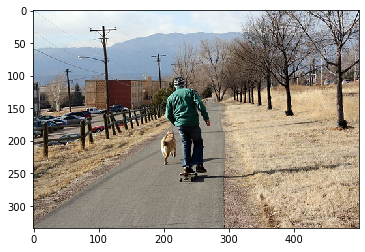

KeyError: 324158

In [44]:
from pycocotools.coco import COCO
annFile="/home/chris/cnn/coco/annotations/instances_val2017.json"
coco=COCO(annFile)
imgIds =[324158]
print(imgIds)
img = coco.loadImgs(imgIds)[0]
print(img)
root="/home/chris/cnn/coco/val2017"
file_name=img["file_name"]
path=os.path.join(root,file_name)
img=im.imread(path)
plt.imshow(img)
plt.show()

annIds = coco.getAnnIds(imgIds)
anns = coco.loadAnns(annIds)

In [43]:
print(type(anns[0]))
for i in range(5):
    for k,v in anns[i].items():
        print(k,":",v)

<class 'dict'>
segmentation : [[216.7, 211.89, 216.16, 217.81, 215.89, 220.77, 215.89, 223.73, 217.77, 225.35, 219.12, 224.54, 219.12, 220.5, 219.66, 217.27, 219.93, 212.7, 220.46, 207.85, 219.66, 203.01, 218.85, 198.43, 217.77, 195.74, 216.7, 194.93, 215.62, 190.62, 215.62, 186.59, 214.27, 183.89, 211.85, 184.16, 211.85, 187.66, 210.24, 187.66, 209.16, 184.97, 207.81, 183.36, 205.12, 186.59, 205.12, 189.28, 201.08, 192.78, 199.74, 195.2, 196.78, 200.04, 196.51, 203.01, 198.12, 205.43, 197.32, 209.2, 196.78, 213.23, 197.05, 218.89, 199.74, 221.85, 201.62, 225.35, 201.62, 233.69, 201.08, 236.11, 202.97, 236.38, 204.85, 236.11, 204.58, 232.34, 203.78, 228.85, 205.39, 233.15, 207.81, 235.57, 208.62, 234.23, 206.74, 231.27, 205.12, 228.04, 206.74, 222.39, 208.35, 219.96, 210.77, 217.54, 211.85, 221.85, 214.54, 223.73, 212.93, 217.54, 212.93, 215.66, 215.89, 212.96, 216.16, 212.16]]
area : 759.3375500000002
iscrowd : 0
image_id : 324158
bbox : [196.51, 183.36, 23.95, 53.02]
category_id : 18

In [30]:
from Coco import Coco
annFile="/home/chris/cnn/coco/annotations/instances_val2017.json"
root="/home/chris/cnn/coco/val2017"
transform = T.Compose([
                T.Resize((224,224)),
                T.ToTensor()])


coco_val=Coco(root,annFile,transform=transform)


loading annotations into memory...
Done (t=1.56s)
creating index...
index created!


In [ ]:
for imgs,labels in data_loader:
    for i in range(len(imgs)):
        bboxes = []
        ids = []
        img = imgs[i]
        labels_ = labels[i]
        for label in labels_:
            bboxes.append([label['bbox'][0],
            label['bbox'][1],
            label['bbox'][0] + label['bbox'][2],
            label['bbox'][1] + label['bbox'][3]
            ])
            ids.append(label['category_id'])
 
        img = img.permute(1,2,0).numpy()
        img = cv2.cvtColor(img,cv2.COLOR_RGB2BGR)
        for box ,id_ in zip(bboxes,ids):
            x1 = int(box[0])
            y1 = int(box[1])
            x2 = int(box[2])
            y2 = int(box[3])
            cv2.rectangle(img,(x1,y1),(x2,y2),(0,0,255),thickness=2)
            cv2.putText(img, text=str(id_), org=(x1 + 5, y1 + 5), fontFace=font, fontScale=1, 
                thickness=2, lineType=cv2.LINE_AA, color=(0, 255, 0))
        cv2.imshow('test',img)
        cv2.waitKey()
        cv2.cv2.destroyAllWindows()

In [31]:
model=torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True, progress=True, num_classes=91)
coco_loader=loader(coco_val,5)
x,y=next(coco_loader)

1
torch.Size([3, 224, 224])
boxes: torch.Size([20, 4])  iscrowd: torch.Size([20])
1
torch.Size([3, 224, 224])
boxes: torch.Size([20, 4])  iscrowd: torch.Size([20])
1
torch.Size([3, 224, 224])
boxes: torch.Size([1, 4])  iscrowd: torch.Size([1])
1
torch.Size([3, 224, 224])
boxes: torch.Size([1, 4])  iscrowd: torch.Size([1])
1
torch.Size([3, 224, 224])
boxes: torch.Size([18, 4])  iscrowd: torch.Size([18])
1
torch.Size([3, 224, 224])
boxes: torch.Size([18, 4])  iscrowd: torch.Size([18])
1
torch.Size([3, 224, 224])
boxes: torch.Size([4, 4])  iscrowd: torch.Size([4])
1
torch.Size([3, 224, 224])
boxes: torch.Size([4, 4])  iscrowd: torch.Size([4])
1
torch.Size([3, 224, 224])
boxes: torch.Size([4, 4])  iscrowd: torch.Size([4])
1
torch.Size([3, 224, 224])
boxes: torch.Size([4, 4])  iscrowd: torch.Size([4])


In [32]:
print(model)

FasterRCNN(
  (transform): GeneralizedRCNNTransform()
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d()
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d()
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d()
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d()
          (relu): ReLU(inplace=True)
          (downsample): Sequential(
            (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
            (1): FrozenBatchNorm2d()
          )
  

In [ ]:
model.train()
loss=model(x,y)
print(loss)

In [ ]:
targets={}
for k,v in y[0].items():
    targets[k]=v
print(type(targets))
model.train()
loss=model(x,targets)
print(x,y)

In [ ]:
%matplotlib inline
x=x.permute(0,2,3,1)
print(x[0].shape)
plt.imshow(x[0])
plt.show()

In [ ]:
print(type(y))
print(len(y))
print(y[0])
y[0]["boxes"]=y[0].pop("bbox")
for key,value in y[0].items():
    print(key,":",value)
    print("\n")

In [ ]:
# Move to default device
criterion = MultiBoxLoss(priors_cxcy=model.priors_cxcy)

# Epochs
for epoch in range(start_epoch, epochs):

    # Decay learning rate at particular epochs
    if epoch in decay_lr_at:
        adjust_learning_rate(optimizer, decay_lr_to)

    optimizer=torch.optim.Adam();
    # One epoch's training
    print("ok")
    train(train_loader=val_loader,
          model=model,
          criterion=criterion,
          optimizer=optimizer,
          epoch=epoch)



def train(train_loader, model, criterion, optimizer, epoch):
    """
    One epoch's training.
    :param train_loader: DataLoader for training data
    :param model: model
    :param criterion: MultiBox loss
    :param optimizer: optimizer
    :param epoch: epoch number
    """
    model.train()  # training mode enables dropout

    batch_time = AverageMeter()  # forward prop. + back prop. time
    data_time = AverageMeter()  # data loading time
    losses = AverageMeter()  # loss

    start = time.time()

    # Batches
    for i, (images, boxes, labels, _) in enumerate(train_loader):
        data_time.update(time.time() - start)

        # Move to default device
        images = images.to(device)  # (batch_size (N), 3, 300, 300)
        boxes = [b.to(device) for b in boxes]
        labels = [l.to(device) for l in labels]

        # Forward prop.
        predicted_locs, predicted_scores = model(images)  # (N, 8732, 4), (N, 8732, n_classes)

        # Loss
        loss = criterion(predicted_locs, predicted_scores, boxes, labels)  # scalar

        # Backward prop.
        optimizer.zero_grad()
        loss.backward()

        # Clip gradients, if necessary
        if grad_clip is not None:
            clip_gradient(optimizer, grad_clip)

        # Update model
        optimizer.step()

        losses.update(loss.item(), images.size(0))
        batch_time.update(time.time() - start)

        start = time.time()

        # Print status
        if i % print_freq == 0:
            print('Epoch: [{0}][{1}/{2}]\t'
                  'Batch Time {batch_time.val:.3f} ({batch_time.avg:.3f})\t'
                  'Data Time {data_time.val:.3f} ({data_time.avg:.3f})\t'
                  'Loss {loss.val:.4f} ({loss.avg:.4f})\t'.format(epoch, i, len(train_loader),
                                                                  batch_time=batch_time,
                                                                  data_time=data_time, loss=losses))
    del predicted_locs, predicted_scores, images, boxes, labels  # free some memory since their histories may be stored